# Ex 1 sol
## intro to aero 2024/2 tau 
A. The actual angle of attack that the wing section "sees" depends on the radial location alond the wing
\begin{equation}
\alpha =tan^{-1} \frac{V_{\theta}}{V_{\inf}}+\beta
\end{equation}
<img src="draw_Ex1.png" width="600" height="450"> 
Wheras the Tangential speed is dependened on the location along the wing and is calculated as follows:
$$ 
V_{\theta}=\omega\cdot r
$$
Notice that the function $\alpha (r)$ can be approximated as linear in the range along the wing




Text(0.5, 0, '$r [m]$')

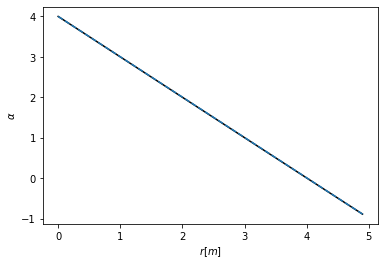

In [112]:
import numpy as np
from matplotlib import pyplot as plt
R_wing=5 #wind length meters
r=np.arange(0,R_wing,0.1)#different adial placemant 
rpm=2*np.pi/60#rpm to rad/sec
omega=5*rpm
V_theta=r*omega
#approaching wind speed:
V_inf=30 #m/s
alpha=-np.arctan(V_theta/V_inf)*180/np.pi+4
fig,ax=plt.subplots()
ax.plot(r,alpha,color='k')
ax.plot([r[0],r[-1]],[alpha[0],alpha[-1]],'--')
ax.set_ylabel(r'$\alpha$')
ax.set_xlabel(r'$r [m]$')

b. Now we know the airfoil is NACA 0012 which is a clasical thin symetrical airfoil meaning $C_l(\alpha=0)=0$ and the $\frac{dC_l}{d\alpha}=2\pi$.
Thus after obtaining the angle of attack as function of radial location we easily can calculate the lift coeficient,

Text(0.5, 0, '$r [m]$')

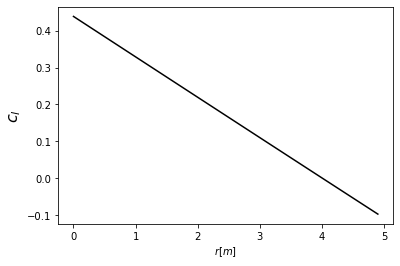

In [113]:
cl=2*np.pi*np.deg2rad(alpha) 
fig,ax=plt.subplots()
ax.plot(r,cl,color='k')
ax.set_ylabel(r'$c_l$',size=16)
ax.set_xlabel(r'$r [m]$')

c. Now given that the wing cord differs from 5 [m] to 1 [m] along the wing we can calcualte the forces acting on the wing.
For every radial locatio we can calculate the lift (L') and drag(D') forces pers unit length:
$$
L'=\frac{1}{2}\rho V^2_{tot}cC_l \\
D'=\frac{1}{2}\rho V^2_{tot}cC_d \\
$$
the drag coefficient is approximately constant for the wind turbine operting conditions, $C_d=0.02$ and $C_l$ was calucated in the preveous section.
The total approaching velocity equal to $V_{tot}=\sqrt{V_{\inf}^2+V^2_{\theta}}$

In [114]:
rho=1.2#air density
mu=1.5e-5#air dynamic viscosity
c=np.linspace(5,1,len(r))
V_tot=np.sqrt(V_inf**2+V_theta**2)
L_tag=0.5*rho*V_tot**2*c*cl
cd=0.02
D_tag=0.5*rho*V_tot**2*c*cd

It will be far more convinient to move for drag and lift forces to axial and normal forces notation due to them being in a constant direction in respect to the turbine:
$$
A'=D'cos\alpha-L'sin\alpha \\
N'=D'sin\alpha+L'cos\alpha
$$
The total force is $R=\sqrt{N^2+A^2}$ but the more important projection is the tangential force $F_{\theta}$ which can be calculated:
$$
F'_{\theta}=N'cos\beta-A'sin\beta
$$
there also be the rotation axis force ,$F_z$:
$$
F'_{z}=N'sin\beta+A'cos\beta
$$
$F_\theta$ is the force producing the electric power while $F_z$ only adds stress to the turbine structure.

$$
F_{\theta}=\int_0^R F_{\theta}'dr
$$

$$
M=\int_0^R r \cdot F_{\theta}'dr
$$

In [115]:
A_tag=D_tag*np.cos(np.deg2rad(alpha))-L_tag*np.sin(np.deg2rad(alpha))
N_tag=D_tag*np.sin(np.deg2rad(alpha))+L_tag*np.cos(np.deg2rad(alpha))
beta=2
F_theta_tag=N_tag*np.cos(np.deg2rad(beta))-A_tag*np.sin(np.deg2rad(beta))
F_z_tag=N_tag*np.sin(np.deg2rad(beta))+A_tag*np.cos(np.deg2rad(beta))

Text(0.5, 0, '$r [m]$')

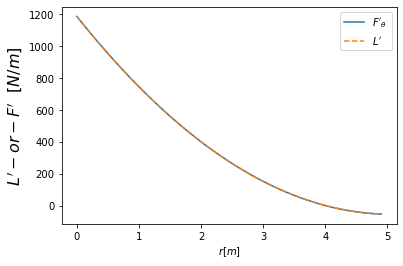

In [116]:

fig,ax=plt.subplots()
ax.plot(r,F_theta_tag,label=r"$F'_{\theta}$")
ax.plot(r,L_tag,label=r"$L'$",ls='--')
ax.legend()
ax.set_ylabel(r"$L'-or-F' \ \ [N/m]$",size=16)
ax.set_xlabel(r'$r [m]$')

In [117]:
F_theta=np.trapz(F_theta_tag,r)
F_z=np.trapz(F_z_tag,r)

print(f"The total force cting on the wing is equal to {np.sqrt(F_theta**2+F_z**2)} N")

The total force cting on the wing is equal to 1830.6484501024102 N


In [118]:
M=3*np.trapz(r*F_theta_tag,r)
print(f"The total momant the wing subject to rotate the turbine is{M} Nm")

The total momant the wing subject to rotate the turbine is5977.491589290315 Nm


In [120]:
P=M*omega
print(f"Thus  the total power the turbine can produce is {P*1e-3} KW")

Thus  the total power the turbine can produce is 3.1298072773015377 KW
